# Nodal Responses Visualization (Pyvista)

In [1]:
import openseespy.opensees as ops

import opstool as opst
import opstool.vis.pyvista as opsvis


In [2]:
opst.load_ops_examples("ArchBridge2")
# or your model code here

In [3]:
on_notebook = True
jupyter_backend = "static"  # or None
# on_notebook = False
# jupyter_backend = None

### Model Geometry

In [4]:
opsvis.set_plot_props(
    point_size=0,
    line_width=3,
    notebook=on_notebook,  # Set to False for practical use, display in a separate window
)

In [26]:
fig = opsvis.plot_model(show_outline=True)
fig.show(jupyter_backend=None)
# fig.show()

Widget(value='<iframe src="http://localhost:58357/index.html?ui=P_0x2d1d963b170_11&reconnect=auto" class="pyvi…

### Gravity Analysis

Apply the gravity load according to the mass in the model:

In [6]:
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
_ = opst.pre.gen_grav_load(factor=-9810)

Analysis Parameters:

In [7]:
ops.system("BandGeneral")
# Create the constraint handler, the transformation method
ops.constraints("Transformation")
# Create the DOF numberer, the reverse Cuthill-McKee algorithm
ops.numberer("RCM")
# Create the convergence test, the norm of the residual with a tolerance of
# 1e-12 and a max number of iterations of 10
ops.test("NormDispIncr", 1.0e-12, 10, 3)
# Create the solution algorithm, a Newton-Raphson algorithm
ops.algorithm("Newton")
# Create the integration scheme, the LoadControl scheme using steps of 0.1
ops.integrator("LoadControl", 0.1)
# Create the analysis object
ops.analysis("Static")

Analysis and Saving Results

In [8]:
ODB = opst.post.CreateODB(odb_tag=1)
for i in range(10):
    ops.analyze(1)
    ODB.fetch_response_step()
ODB.save_response()

OPSTOOL ::  All responses data with _odb_tag = 1 saved in .opstool.output/RespStepData-1.nc!

### Nodal Responses Visualization

#### via Slides

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

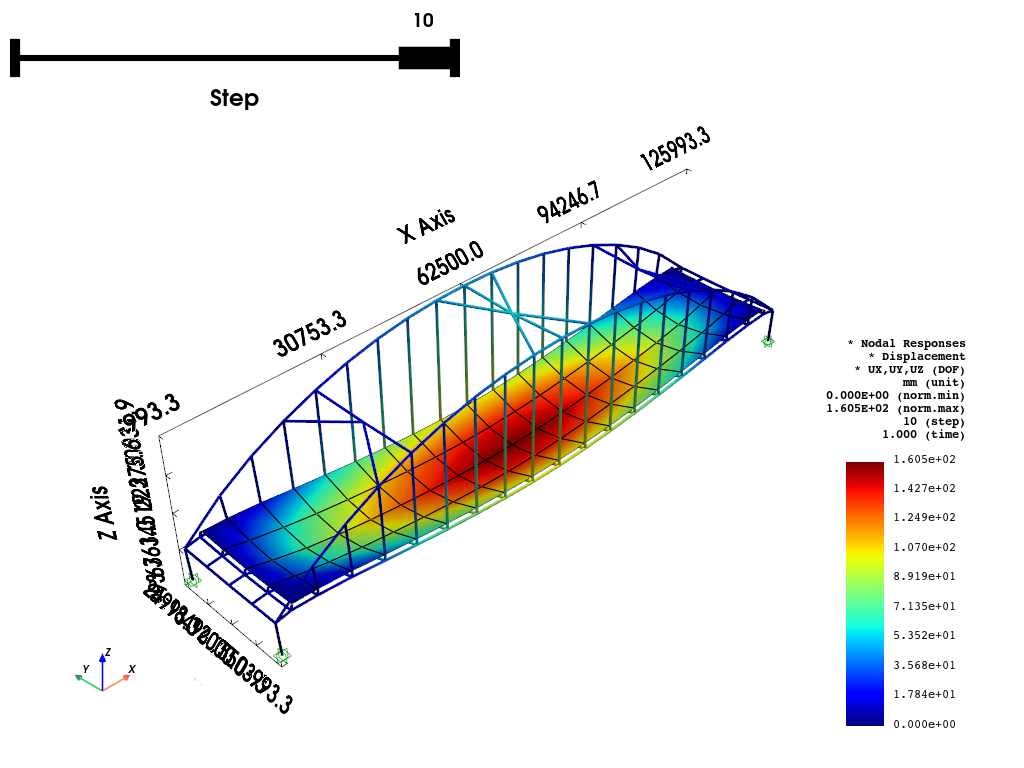

In [9]:
opsvis.set_plot_props(scalar_bar_kargs={"title_font_size": 12, "label_font_size": 12})

fig = opsvis.plot_nodal_responses(
    odb_tag=1,
    slides=True,
    resp_type="disp",
    resp_dof=["UX", "UY", "UZ"],
    unit_symbol="mm",
    show_outline=True,
    defo_scale="auto",
)
fig.show(jupyter_backend=jupyter_backend)
# fig.show()

#### Change the unit dispaly

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

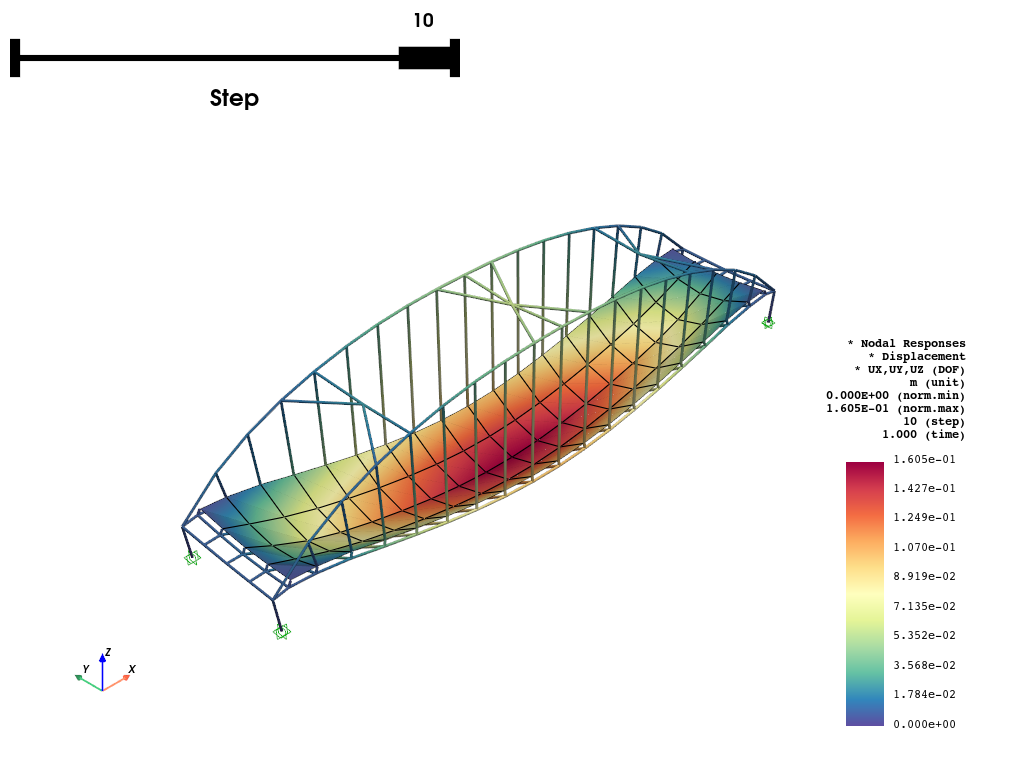

In [10]:
opsvis.set_plot_colors(cmap="Spectral_r")
fig = opsvis.plot_nodal_responses(
    odb_tag=1,
    slides=True,
    step=9,
    resp_type="disp",
    resp_dof=["UX", "UY", "UZ"],
    unit_symbol="m",
    unit_factor=1e-3,
    defo_scale=100,  # you can adjust the deformation scale factor here
)
fig.show(jupyter_backend=jupyter_backend)
# fig.show()

#### Animation

In [11]:
fig = opsvis.plot_nodal_responses_animation(
    odb_tag=1,
    framerate=2,
    defo_scale=100,
    savefig="images/NodalRespAnimation.gif",
    resp_type="disp",
    resp_dof=["UX", "UY", "UZ"],
    unit_symbol="m",
    unit_factor=1e-3,
)
fig.close()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

Animation has been saved to images/NodalRespAnimation.gif!


![NodalRespAnimation](images/NodalRespAnimation.gif)

### Interacting with Pyvista

Since version 1.0.18, opstool provides a function ``get_nodal_responses_dataset`` that returns a pyvista [UnstructuredGrid](https://docs.pyvista.org/api/core/_autosummary/pyvista.unstructuredgrid#pyvista.UnstructuredGrid) so that you can take advantage of all the functionality on it.

In [21]:
import pyvista as pv

grid = opsvis.get_nodal_responses_dataset(
    odb_tag=1,
    step="absMax",
    resp_type="disp",
    resp_dof=["UX", "UY", "UZ"],
    defo_scale=100,
)

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

The name of the scalar data to be activated will be the passed in ``resp_type``:

In [22]:
print(grid)
print(grid.active_scalars_name)

UnstructuredGrid (0x2d1ee4ffac0)
  N Cells:    439
  N Points:   241
  X Bounds:   -8.820e+02, 1.259e+05
  Y Bounds:   -7.853e+01, 2.408e+04
  Z Bounds:   -8.045e+03, 2.775e+04
  N Arrays:   1
disp


You can call the plot method directly:

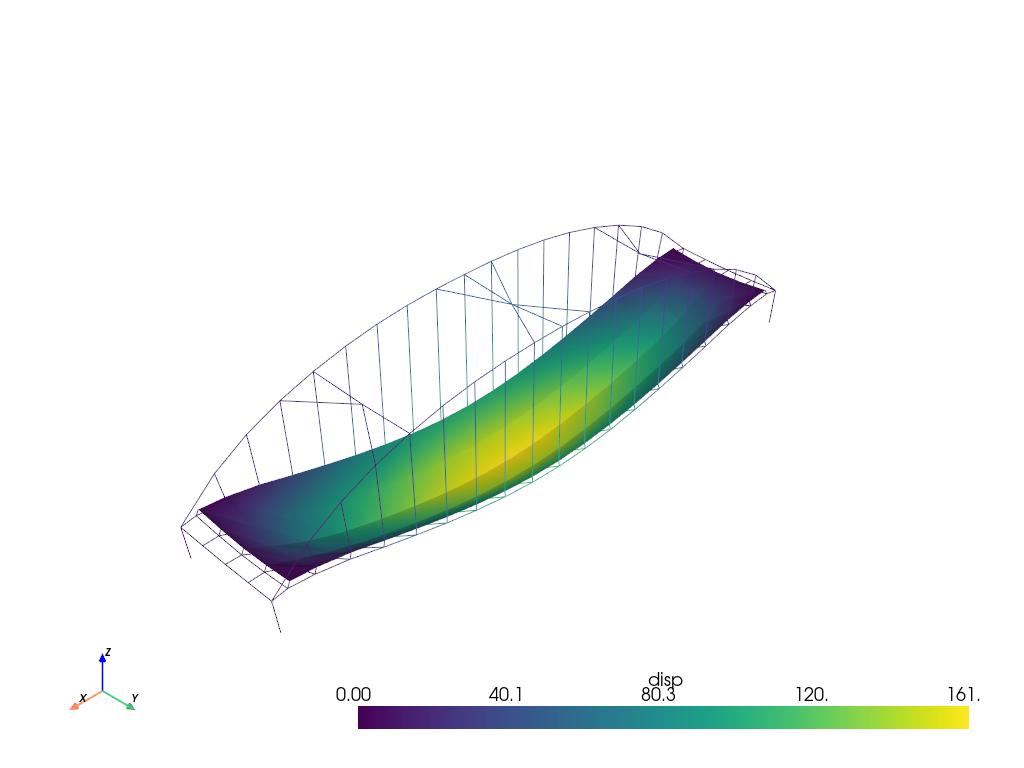

In [19]:
grid.plot(jupyter_backend=jupyter_backend)

You can also use the filters provided by pyvista:

[DataSetFilters](https://docs.pyvista.org/api/core/_autosummary/pyvista.datasetfilters#pyvista.DataSetFilters)


For example, using some common filters:

[Using Common Filters](https://docs.pyvista.org/examples/01-filter/using_filters)
    
    

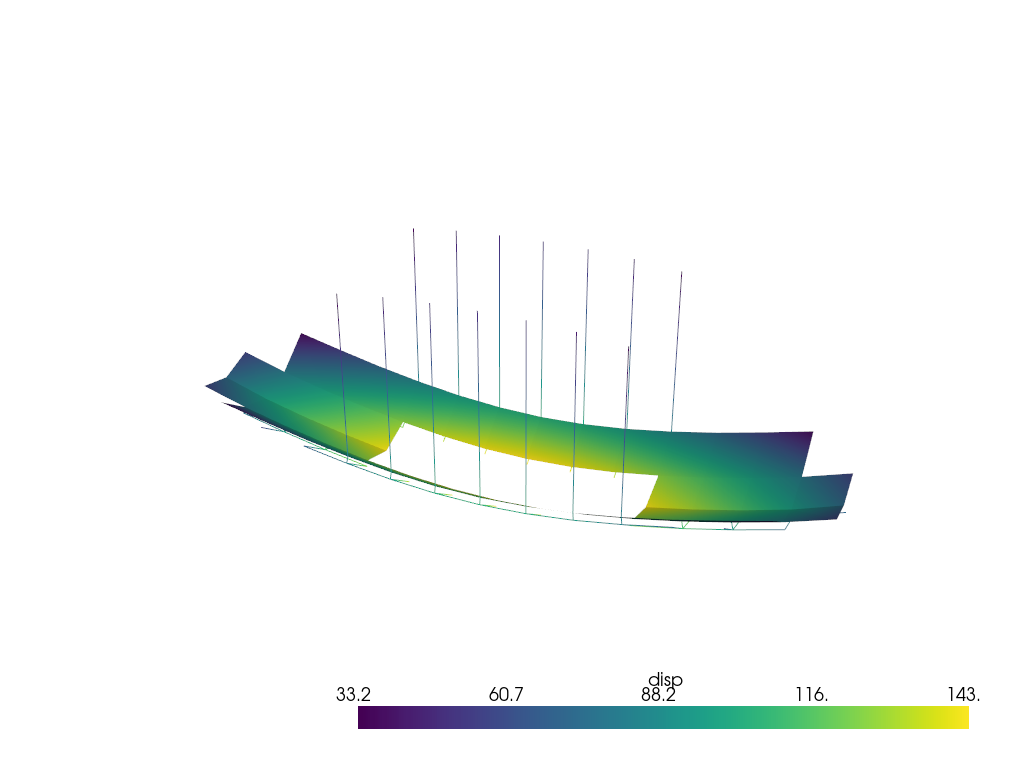

In [24]:
# Apply a threshold over a data range
threshed = grid.threshold([80, 120])

p = pv.Plotter()
p.add_mesh(threshed)
p.camera_position = [-2, 5, 3]
p.show(jupyter_backend=jupyter_backend)

More details can be found in the [PyVista Examples](https://docs.pyvista.org/examples/).